In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.model_selection import cross_val_score
import pandas as pd

mnist = fetch_openml('mnist_784')

In [2]:
mnist_df = pd.DataFrame(mnist.data)
mnist_df['target'] = mnist.target
mnist_df.to_csv('mnist.csv', index=False)

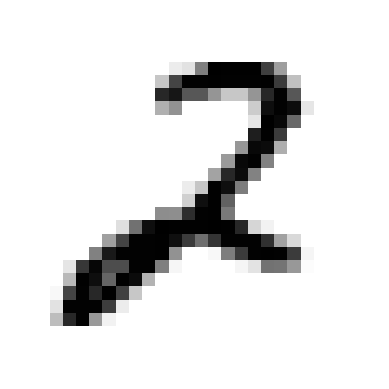

In [3]:
x, y = mnist['data'], mnist['target']

some_digit = x.to_numpy()[36001]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap=plt.cm.binary,
           interpolation='nearest')
plt.axis("off")
plt.show()

In [4]:
x_train, x_test = x[:60000].to_numpy(), x[6000:70000].to_numpy()
y_train, y_test = y[:60000].to_numpy(), y[6000:70000].to_numpy()

shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)

In [8]:
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)
example = knn.predict([some_digit])
print(example)

[2]


In [9]:
a = cross_val_score(knn, x_train, y_train, cv=3, scoring="accuracy")
print(a.mean())

0.9681000000000001


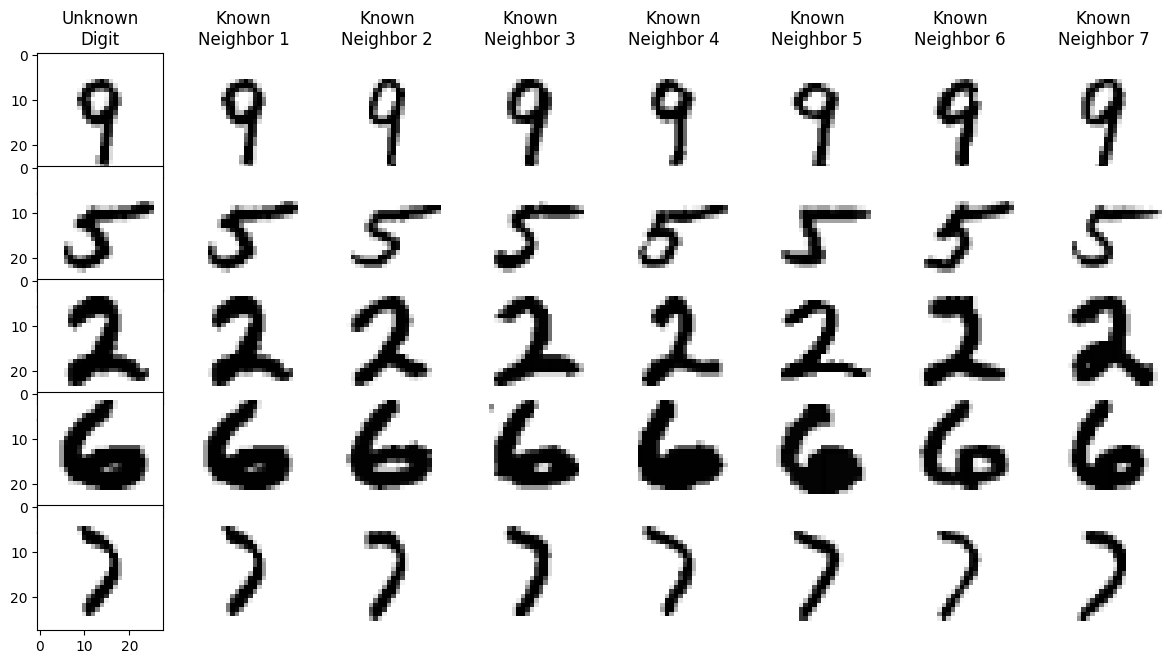

In [12]:
row = 5; col = 7; sft = 10
knn = NearestNeighbors(n_neighbors=col)
knn.fit(x_train)
distances, indicies = knn.kneighbors(x_test)

displayV = pd.DataFrame(x_test).iloc[sft:row+sft].values
displayT = pd.DataFrame(x_train).iloc[pd.DataFrame(indicies[sft:row+sft]).values.flatten()].values
plt.figure(figsize=(15,row*1.5))
for i in range(row):
    plt.subplot(row,col+1,(col+1)*i+1)
    plt.imshow(displayV[i].reshape((28,28)),cmap=plt.cm.binary)
    if i==0: plt.title('Unknown\nDigit')
    for j in range(col):
        plt.subplot(row, col+1, (col+1)*i+j+2)
        plt.imshow(displayT[col*i+j].reshape((28,28)),cmap=plt.cm.binary)
        if i==0: plt.title('Known\nNeighbor '+str(j+1))
        plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

In [16]:
accs = []
for k in range(3,22):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_hat_p = knn.predict_proba(x_test)
    acc = (y_hat_p.argmax(axis=1)==y_test).sum()/y_test.shape[0]
    print(k,', ',end='')
    accs.append(acc)

3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11 , 12 , 13 , 14 , 15 , 16 , 17 , 18 , 19 , 20 , 21 , 

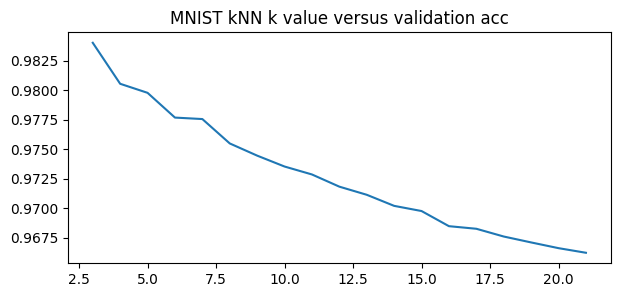

In [18]:
plt.figure(figsize=(7,3))
plt.plot(range(3,22),accs)
plt.title('MNIST kNN k value versus validation acc')
plt.show()